In [329]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir('/home/despoB/kaihwang/bin/TDSigEI/ROIs')

In [330]:
#organize data frame
%run dataframe_peakFIR.py
FIR_df.head()

,Beta,ROI,Subj,Condition
0,1.175582,FFA,512.0,FH
1,1.715424,FFA,512.0,Fo
2,0.882982,FFA,512.0,Fp
3,0.383560,FFA,512.0,HF
4,0.824991,FFA,512.0,Ho


(-5, 10)

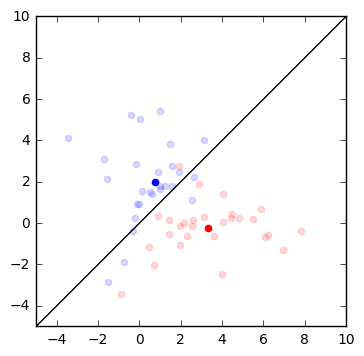

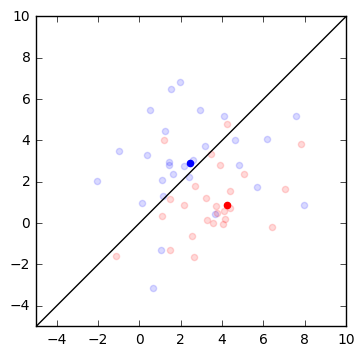

In [334]:
# extract conditions to plot in representation space
# x is FFA, y is PPA, each data point is a subject
x1 = FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='Hp')]['Beta'].values
y1 = FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='Hp')]['Beta'].values
x2 = FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='Fp')]['Beta'].values
y2 = FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='Fp')]['Beta'].values

mx1 = np.mean(FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='Hp')]['Beta'].values)
my1 = np.mean(FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='Hp')]['Beta'].values)
mx2 = np.mean(FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='Fp')]['Beta'].values)
my2 = np.mean(FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='Fp')]['Beta'].values)


plt.figure(0)
plt.scatter(x1,y1, color='blue', alpha=.15)
plt.scatter(x2,y2, color='red', alpha=.15)
plt.scatter(mx1,my1, color='blue', alpha=1)
plt.scatter(mx2,my2, color='red', alpha=1)
plt.plot([-5,10],[-5,10],'k')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-5,10])
plt.ylim([-5,10])

# extract conditions to plot
# x is FFA, y is PPA, each data point is a subject
x1 = FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='HF')]['Beta'].values
y1 = FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='HF')]['Beta'].values
x2 = FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='FH')]['Beta'].values
y2 = FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='FH')]['Beta'].values
mx1 = np.mean(FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='HF')]['Beta'].values)
my1 = np.mean(FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='HF')]['Beta'].values)
mx2 = np.mean(FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='FH')]['Beta'].values)
my2 = np.mean(FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='FH')]['Beta'].values)
plt.figure(1)
plt.scatter(x1,y1, color='blue', alpha=.15)
plt.scatter(x2,y2, color='red', alpha=.15)
plt.scatter(mx1,my1, color='blue', alpha=1)
plt.scatter(mx2,my2, color='red', alpha=1)
plt.plot([-5,10],[-5,10],'k')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-5,10])
plt.ylim([-5,10])

[[ 1.          0.07234458]
 [ 0.07234458  1.        ]]
[[ 1.          0.24443144]
 [ 0.24443144  1.        ]]


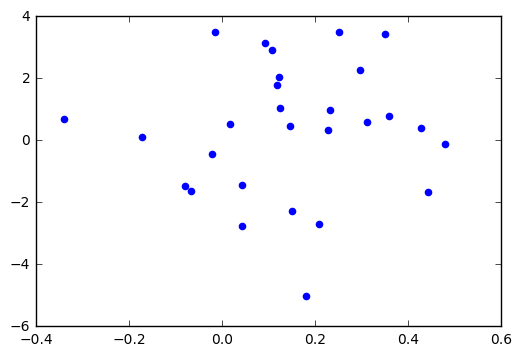

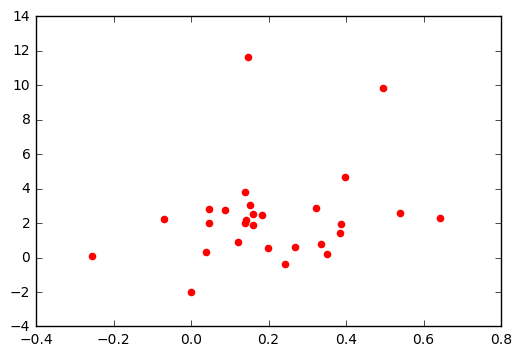

In [337]:
# calculat distance to boundary for subjects, correlate with MTD

import math
def dist(x1,y1, x2,y2, x3,y3): # x3,y3 is the point
    px = x2-x1
    py = y2-y1

    something = px*px + py*py

    u =  ((x3 - x1) * px + (y3 - y1) * py) / float(something)

    if u > 1:
        u = 1
    elif u < 0:
        u = 0

    x = x1 + u * px
    y = y1 + u * py

    dx = x - x3
    dy = y - y3

    dist = math.sqrt(dx*dx + dy*dy)

    return dist

MTD_df = pd.read_csv('/home/despoB/kaihwang/bin/TDSigEI/Data/conn.csv')

x1 = FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='HF')]['Beta'].values
y1 = FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='HF')]['Beta'].values
x2 = FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='FH')]['Beta'].values
y2 = FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='FH')]['Beta'].values

D_HF=np.zeros(len(x1))
D_FH=np.zeros(len(x1))
for i in np.arange(0,len(x1)):
     dhf=dist(-5,-5,20,20,x1[i],y1[i])
     if x1[i] > y1[i]:
        dhf = -1*dhf
     D_HF[i] = dhf
     dfh=dist(-5,-5,20,20,x2[i],y2[i])
     if y2[i] > x2[i]:
        dfh = -1*dfh   
     D_FH[i] = dfh   

plt.figure(0)        
plt.scatter(MTD_df[MTD_df['Condition']=='HF']['MTD-PPA-VC'].values
            ,D_HF, color='blue', alpha=1) 
print np.corrcoef(MTD_df[MTD_df['Condition']=='HF']['MTD-PPA-VC'].values, D_HF )

plt.figure(1)
plt.scatter(MTD_df[MTD_df['Condition']=='FH']['MTD-FFA-VC'].values
            ,D_FH, color='red', alpha=1) 
print np.corrcoef(MTD_df[MTD_df['Condition']=='FH']['MTD-FFA-VC'].values, D_FH )

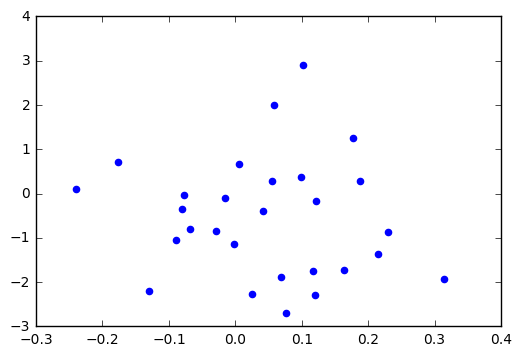

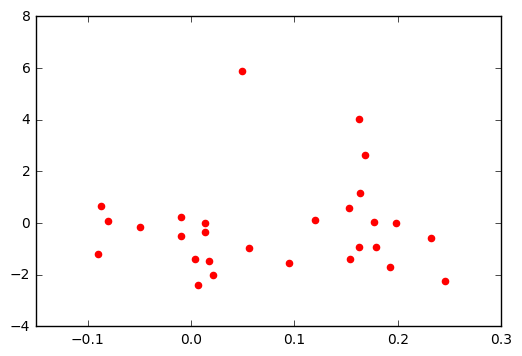

In [341]:
# calculat change distance to boundary for passive to attn conditions, correlate with change in MTD

FFA_Hp = FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='Hp')]['Beta'].values
PPA_Hp = FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='Hp')]['Beta'].values
FFA_HF = FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='HF')]['Beta'].values
PPA_HF = FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='HF')]['Beta'].values

FFA_Fp = FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='Fp')]['Beta'].values
PPA_Fp = FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='Fp')]['Beta'].values
FFA_FH = FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='FH')]['Beta'].values
PPA_FH = FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='FH')]['Beta'].values

D_HFvHp = np.zeros(len(FFA_Hp))
D_FHvFp = np.zeros(len(FFA_Hp))
for i in np.arange(0,len(FFA_Hp)):
     dhp=dist(-5,-5,20,20,FFA_Hp[i],PPA_Hp[i])
     if FFA_Hp[i] > PPA_Hp[i]:
        dhp = -1*dhp
     dhf=dist(-5,-5,20,20,FFA_HF[i],PPA_HF[i])   
     if FFA_HF[i] > PPA_HF[i]:
        dhf = -1*dhf           
     D_HFvHp[i] = dhf-dhp
     
     dfp=dist(-5,-5,20,20,FFA_Fp[i],PPA_Fp[i])
     if PPA_Fp[i] > FFA_Fp[i]:
        dfp = -1*dfp
     dfh=dist(-5,-5,20,20,FFA_FH[i],PPA_FH[i])   
     if PPA_FH[i] > FFA_FH[i]:
        dfh = -1*dfh           
     D_FHvFp[i] = dfh-dfp 

plt.figure(0)        
plt.scatter(MTD_df[MTD_df['Condition']=='HF']['MTD-PPA-VC'].values - MTD_df[MTD_df['Condition']=='Hp']['MTD-PPA-VC'].values
            ,D_HFvHp, color='blue', alpha=1) 
#print np.corrcoef((MTD_df[MTD_df['Condition']=='HF']['MTD-PPA-VC'].values - MTD_df[MTD_df['Condition']=='Hp']['MTD-PPA-VC'].values, 
                   #D_HF)

plt.figure(1)
plt.scatter(MTD_df[MTD_df['Condition']=='FH']['MTD-FFA-VC'].values - MTD_df[MTD_df['Condition']=='Fp']['MTD-FFA-VC'].values
            ,D_FHvFp, color='red', alpha=1) 




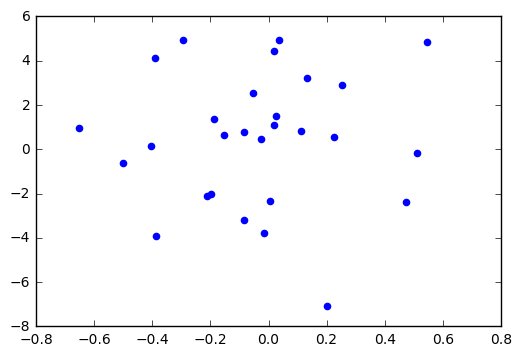

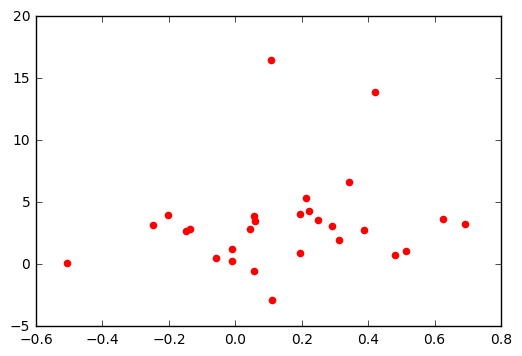

In [360]:
#test evoke amplitude components' correlation with MTD estimates

FFA_Hp = FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='Hp')]['Beta'].values
PPA_Hp = FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='Hp')]['Beta'].values
FFA_HF = FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='HF')]['Beta'].values
PPA_HF = FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='HF')]['Beta'].values

FFA_Fp = FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='Fp')]['Beta'].values
PPA_Fp = FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='Fp')]['Beta'].values
FFA_FH = FIR_df.loc[(FIR_df['ROI']=='FFA') & (FIR_df['Condition'] =='FH')]['Beta'].values
PPA_FH = FIR_df.loc[(FIR_df['ROI']=='PPA') & (FIR_df['Condition'] =='FH')]['Beta'].values


# two types of signal, gain and bias, gain for overall eovke amplitude change across categories, 
# bias for biasing evoke amplitude for one particular category
Gain_HF = np.zeros(len(FFA_Hp))
Gain_FH = np.zeros(len(FFA_Hp))
Bias_HF = np.zeros(len(FFA_Hp))
Bias_FH = np.zeros(len(FFA_Hp))
Gain_Hp = np.zeros(len(FFA_Hp))
Gain_Fp = np.zeros(len(FFA_Hp))
Bias_Hp = np.zeros(len(FFA_Hp))
Bias_Fp = np.zeros(len(FFA_Hp))

for i in np.arange(0,len(FFA_Hp)):
    if FFA_HF[i] > PPA_HF[i]:
        Gain_HF[i] = FFA_HF[i]
        Bias_HF[i] = PPA_HF[i] - FFA_HF[i]
    elif FFA_HF[i] < PPA_HF[i]:
        Gain_HF[i] = PPA_HF[i]
        Bias_HF[i] = -1*(FFA_HF[i] - PPA_HF[i])
    
    if FFA_FH[i] > PPA_FH[i]:
        Gain_FH[i] = PPA_FH[i]
        Bias_FH[i] = FFA_FH[i] - PPA_FH[i]
    elif FFA_FH[i] < PPA_FH[i]:
        Gain_FH[i] = FFA_FH[i]
        Bias_FH[i] = -1*(PPA_FH[i] - FFA_FH[i])
        
        
        
        
plt.figure(0)        
plt.scatter(MTD_df[MTD_df['Condition']=='HF']['MTD-PPA-VC'].values - MTD_df[MTD_df['Condition']=='HF']['MTD-FFA-VC'].values
            ,Bias_HF, color='blue', alpha=1) 


plt.figure(1)
plt.scatter(MTD_df[MTD_df['Condition']=='FH']['MTD-FFA-VC'].values - MTD_df[MTD_df['Condition']=='FH']['MTD-PPA-VC'].values
            ,Bias_FH, color='red', alpha=1) 



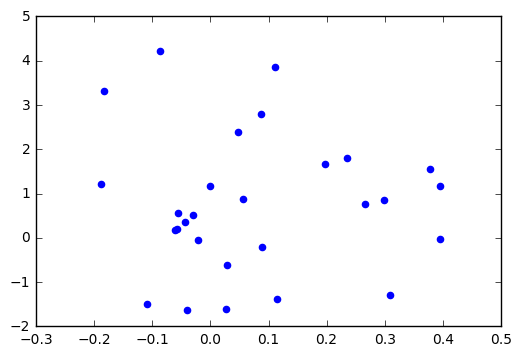

In [373]:
## correlate with fc

BC_IPS_FH_FFA = np.loadtxt('/home/despoB/kaihwang/bin/TDSigEI/Data/BC_IPS_FH_FFA')
BC_IPS_FH_PPA = np.loadtxt('/home/despoB/kaihwang/bin/TDSigEI/Data/BC_IPS_FH_PPA')
BC_IPS_HF_FFA = np.loadtxt('/home/despoB/kaihwang/bin/TDSigEI/Data/BC_IPS_HF_FFA')
BC_IPS_HF_PPA = np.loadtxt('/home/despoB/kaihwang/bin/TDSigEI/Data/BC_IPS_HF_PPA')

plt.figure(0)        
plt.scatter(BC_IPS_FH_PPA + BC_IPS_FH_FFA , Gain_FH, color='blue', alpha=1) 